In [113]:
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
# reading file 
df = pd.read_csv("c_Healthcare_dataset.csv")
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [115]:
df.describe(include=['object'])

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls
count,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,...,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424
unique,3424,2,2,4,3,5,4,36,2,3,...,2,2,2,2,2,2,2,2,2,2
top,P1,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,N
freq,1,2135,3230,3148,3235,1383,1439,1535,2013,2104,...,3406,3066,3382,1788,3232,3357,3370,3413,3410,3355


In [116]:
data_info = df.info()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [117]:
# finding missing value
missing_val = df.isnull().sum()
print(missing_val[missing_val>0])

Series([], dtype: int64)


In [118]:
# Convert 'NaN' strings to actual np.nan (NaN) values
df.replace('NaN', np.nan, inplace=True)

# Verify if 'NaN' strings are converted
df.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

In [119]:
# data cleaning on columns names 
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns.tolist())

['ptid', 'persistency_flag', 'gender', 'race', 'ethnicity', 'region', 'age_bucket', 'ntm_speciality', 'ntm_specialist_flag', 'ntm_speciality_bucket', 'gluco_record_prior_ntm', 'gluco_record_during_rx', 'dexa_freq_during_rx', 'dexa_during_rx', 'frag_frac_prior_ntm', 'frag_frac_during_rx', 'risk_segment_prior_ntm', 'tscore_bucket_prior_ntm', 'risk_segment_during_rx', 'tscore_bucket_during_rx', 'change_t_score', 'change_risk_segment', 'adherent_flag', 'idn_indicator', 'injectable_experience_during_rx', 'comorb_encounter_for_screening_for_malignant_neoplasms', 'comorb_encounter_for_immunization', 'comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx', 'comorb_vitamin_d_deficiency', 'comorb_other_joint_disorder_not_elsewhere_classified', 'comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx', 'comorb_long_term_current_drug_therapy', 'comorb_dorsalgia', 'comorb_personal_history_of_other_diseases_and_conditions', 'comorb_other_disorders_of_bone_density_and_structure',

In [120]:
import re

# Function to clean text data with regex
def clean_text(text):
    if isinstance(text, str):  # Only process if the value is a string
        text = re.sub(r'[^\w\s<>-]', '', text)  # Remove special characters but keep '<', '>', '-'
        text = text.lower()  # Convert to lowercase
        text = text.strip()  # Remove leading/trailing whitespaces
    return text

# Select all columns that are not numeric and exclude specific columns from cleaning
excluded_columns = ['age_bucket', 'tscore_bucket_prior_ntm', 'tscore_bucket_during_rx']
text_columns = df.select_dtypes(exclude=['int64', 'float64']).columns.difference(excluded_columns)

# Apply the cleaning function to all object-type columns, except the excluded ones
for col in text_columns:
    df[col] = df[col].apply(clean_text)

# Verify the cleaning by inspecting a few columns
df[text_columns].head()



,adherent_flag,change_risk_segment,change_t_score,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_dorsalgia,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_encounter_for_immunization,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_gastro_esophageal_reflux_disease,...,risk_recurring_falls,risk_rheumatoid_arthritis,risk_segment_during_rx,risk_segment_prior_ntm,risk_smoking_tobacco,risk_type_1_insulin_dependent_diabetes,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_vitamin_d_insufficiency
0,adherent,unknown,no change,n,y,y,y,y,n,n,...,n,n,vlr_lr,vlr_lr,n,n,n,n,n,n
1,adherent,unknown,unknown,n,n,y,n,n,n,n,...,n,n,unknown,vlr_lr,n,n,n,n,n,n
2,adherent,no change,no change,n,n,y,n,n,y,n,...,n,n,hr_vhr,hr_vhr,n,n,n,n,n,n
3,adherent,no change,no change,y,y,y,n,y,n,y,...,n,n,hr_vhr,hr_vhr,y,n,n,n,n,n
4,adherent,unknown,unknown,n,y,y,n,y,y,n,...,n,n,unknown,hr_vhr,y,n,n,n,n,n


In [121]:
print(df['age_bucket'].unique())

['>75' '55-65' '65-75' '<55']


In [122]:
# Clean or remap 'age_bucket' column, adjust the mapping based on unique values found
age_mapping = {'<55': 1, '55-65': 2, '65-75': 3, '>75': 4}

# Apply the mapping, and ensure NaN values for unmapped categories
df['age_bucket_numeric'] = df['age_bucket'].map(age_mapping)

# Check if there are still unmapped categories (NaNs)
if df['age_bucket_numeric'].isna().sum() > 0:
    print("Warning: Some 'age_bucket' values were not mapped.")
    print(df[df['age_bucket_numeric'].isna()])
print(df[['age_bucket', 'age_bucket_numeric']].head())


  age_bucket  age_bucket_numeric
0        >75                   4
1      55-65                   2
2      65-75                   3
3        >75                   4
4        >75                   4


In [123]:
# Updated mapping for 'Tscore_Bucket_Prior_Ntm' and 'Tscore_Bucket_During_Rx'
tscore_bucket_mapping = {
    '>-2.5': 1,
    '<=-2.5': 2,
    'Unknown': 0  # 'Unknown' gets a value of 0
}

# Apply the mapping to both 'Tscore_Bucket_Prior_Ntm' and 'Tscore_Bucket_During_Rx'
df['tscore_bucket_prior_numeric'] = df['tscore_bucket_prior_ntm'].map(tscore_bucket_mapping)
df['tscore_bucket_during_numeric'] = df['tscore_bucket_during_rx'].map(tscore_bucket_mapping)

# Check for unmapped values in both columns
if df['tscore_bucket_prior_numeric'].isna().sum() > 0:
    print("Warning: Some 'tscore_bucket_prior_ntm' values were not mapped.")
    print(df[df['tscore_bucket_prior_numeric'].isna()])

if df['tscore_bucket_during_numeric'].isna().sum() > 0:
    print("Warning: Some 'tscore_bucket_during_rx' values were not mapped.")
    print(df[df['tscore_bucket_during_numeric'].isna()])

# Check the result
print(df[['tscore_bucket_prior_ntm', 'tscore_bucket_prior_numeric']].head())
print(df[['tscore_bucket_during_rx', 'tscore_bucket_during_numeric']].head())


  tscore_bucket_prior_ntm  tscore_bucket_prior_numeric
0                   >-2.5                            1
1                   >-2.5                            1
2                  <=-2.5                            2
3                   >-2.5                            1
4                  <=-2.5                            2
  tscore_bucket_during_rx  tscore_bucket_during_numeric
0                  <=-2.5                             2
1                 Unknown                             0
2                  <=-2.5                             2
3                  <=-2.5                             2
4                 Unknown                             0


In [124]:
# first attempt in encoding numeric ranges categories
print(f"Number of columns after encoding: {df.shape[1]}")
print(df.head())

Number of columns after encoding: 72
  ptid persistency_flag  gender          race     ethnicity   region  \
0   p1       persistent    male     caucasian  not hispanic     west   
1   p2   non-persistent    male         asian  not hispanic     west   
2   p3   non-persistent  female  otherunknown      hispanic  midwest   
3   p4   non-persistent  female     caucasian  not hispanic  midwest   
4   p5   non-persistent  female     caucasian  not hispanic  midwest   

  age_bucket        ntm_speciality ntm_specialist_flag  ntm_speciality_bucket  \
0        >75  general practitioner              others  obgynotherspcpunknown   
1      55-65  general practitioner              others  obgynotherspcpunknown   
2      65-75  general practitioner              others  obgynotherspcpunknown   
3        >75  general practitioner              others  obgynotherspcpunknown   
4        >75  general practitioner              others  obgynotherspcpunknown   

   ... risk_poor_health_frailty risk_excess

In [125]:
# List of columns already encoded
encoded_columns = ['age_bucket', 'tscore_bucket_prior_ntm', 'tscore_bucket_during_rx']

# Separate columns with only 'Y'/'N' values, and the other with all text categories
columns_with_yn = []
other_text_columns = []

# Iterate through columns and check for 'Y'/'N' values
for col in df.columns:
    if col not in encoded_columns:  # Skip the encoded columns
        unique_values = df[col].dropna().unique()
        if set(unique_values) == {'y', 'n'}:  # Check if unique values are only 'Y' and 'N'
            columns_with_yn.append(col)
        elif df[col].dtype == 'object':  # Check if it's a text column
            other_text_columns.append(col)

# Create two separate DataFrames
df_yn = df[columns_with_yn]  # DataFrame with 'Y'/'N' columns
df_text = df[other_text_columns]  # DataFrame with other text-based columns

# Display summaries of the DataFrames
print(f"Columns with only 'Y'/'N' values: {len(df_yn.columns)}")
print(f"Columns with other text values: {len(df_text.columns)}")

# Display the first few rows
print(df_yn.head())
print(df_text.head())


Columns with only 'Y'/'N' values: 50
Columns with other text values: 14
  gluco_record_prior_ntm gluco_record_during_rx dexa_during_rx  \
0                      n                      n              n   
1                      n                      n              n   
2                      n                      n              n   
3                      n                      y              n   
4                      y                      y              n   

  frag_frac_prior_ntm frag_frac_during_rx idn_indicator  \
0                   n                   n             n   
1                   n                   n             n   
2                   n                   n             n   
3                   n                   n             n   
4                   n                   n             n   

  injectable_experience_during_rx  \
0                               y   
1                               y   
2                               y   
3                           

In [126]:
# Convert 'Y'/'N' columns to binary (1 for 'Y', 0 for 'N')
df_yn = df_yn.applymap(lambda x: 1 if x == 'y' else 0)

# Optional: Display the first few rows after binary encoding
print("Binary encoded 'Y'/'N' columns:")
print(df_yn.head())


Binary encoded 'Y'/'N' columns:
   gluco_record_prior_ntm  gluco_record_during_rx  dexa_during_rx  \
0                       0                       0               0   
1                       0                       0               0   
2                       0                       0               0   
3                       0                       1               0   
4                       1                       1               0   

   frag_frac_prior_ntm  frag_frac_during_rx  idn_indicator  \
0                    0                    0              0   
1                    0                    0              0   
2                    0                    0              0   
3                    0                    0              0   
4                    0                    0              0   

   injectable_experience_during_rx  \
0                                1   
1                                1   
2                                1   
3                           

/var/folders/fs/nc20m2757gj4y9jxvh_1hnph0000gn/T/ipykernel_36227/1161476831.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_yn = df_yn.applymap(lambda x: 1 if x == 'y' else 0)


In [127]:
# Apply one-hot encoding to the text columns
df_text_encoded = pd.get_dummies(df_text, drop_first=True)

# Optional: Display the first few rows after one-hot encoding
print("One-hot encoded text columns:")
print(df_text_encoded.head())


One-hot encoded text columns:
   ptid_p10  ptid_p100  ptid_p1000  ptid_p1001  ptid_p1002  ptid_p1003  \
0     False      False       False       False       False       False   
1     False      False       False       False       False       False   
2     False      False       False       False       False       False   
3     False      False       False       False       False       False   
4     False      False       False       False       False       False   

   ptid_p1004  ptid_p1005  ptid_p1006  ptid_p1007  ...  \
0       False       False       False       False  ...   
1       False       False       False       False  ...   
2       False       False       False       False  ...   
3       False       False       False       False  ...   
4       False       False       False       False  ...   

   risk_segment_prior_ntm_vlr_lr  risk_segment_during_rx_unknown  \
0                           True                           False   
1                           True        

In [128]:
# Display the columns of the DataFrame to check for exact names
print(df.columns)


Index(['ptid', 'persistency_flag', 'gender', 'race', 'ethnicity', 'region',
       'age_bucket', 'ntm_speciality', 'ntm_specialist_flag',
       'ntm_speciality_bucket', 'gluco_record_prior_ntm',
       'gluco_record_during_rx', 'dexa_freq_during_rx', 'dexa_during_rx',
       'frag_frac_prior_ntm', 'frag_frac_during_rx', 'risk_segment_prior_ntm',
       'tscore_bucket_prior_ntm', 'risk_segment_during_rx',
       'tscore_bucket_during_rx', 'change_t_score', 'change_risk_segment',
       'adherent_flag', 'idn_indicator', 'injectable_experience_during_rx',
       'comorb_encounter_for_screening_for_malignant_neoplasms',
       'comorb_encounter_for_immunization',
       'comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx',
       'comorb_vitamin_d_deficiency',
       'comorb_other_joint_disorder_not_elsewhere_classified',
       'comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx',
       'comorb_long_term_current_drug_therapy', 'comorb_dorsalgia',
       'com

In [129]:
# Update the list of already encoded columns
encoded_columns = ['age_bucket_numeric', 'tscore_bucket_prior_numeric', 'tscore_bucket_during_numeric']

# Continue with combining the encoded DataFrames as planned
df_final = pd.concat([df_yn, df_text_encoded, df[encoded_columns]], axis=1)

# Optional: Display the final DataFrame after encoding
print(f"Final DataFrame shape: {df_final.shape}")
print(df_final.head())


Final DataFrame shape: (3424, 3535)
   gluco_record_prior_ntm  gluco_record_during_rx  dexa_during_rx  \
0                       0                       0               0   
1                       0                       0               0   
2                       0                       0               0   
3                       0                       1               0   
4                       1                       1               0   

   frag_frac_prior_ntm  frag_frac_during_rx  idn_indicator  \
0                    0                    0              0   
1                    0                    0              0   
2                    0                    0              0   
3                    0                    0              0   
4                    0                    0              0   

   injectable_experience_during_rx  \
0                                1   
1                                1   
2                                1   
3                       

In [130]:


# Statistical summary of the converted 'age_bucket'
print("\nStatistical Summary of 'age_bucket' (converted to numeric):")
print("Ranges: [<55: 1], [55-65: 2], [65-75: 3], [>75: 4]")
print(df['age_bucket_numeric'].describe())



Statistical Summary of 'age_bucket' (converted to numeric):
Ranges: [<55: 1], [55-65: 2], [65-75: 3], [>75: 4]
count    3424.000000
mean        3.109229
std         0.903647
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: age_bucket_numeric, dtype: float64


In [131]:
# Select only numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Detect outliers using IQR method
Q1 = df[numeric_cols].quantile(0.25, axis=0)  # 25th percentile (Q1) along columns
Q3 = df[numeric_cols].quantile(0.75, axis=0)  # 75th percentile (Q3) along columns
IQR = Q3 - Q1  # Interquartile range

# Detect outliers in numeric columns
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum(axis=0)
print(f"\nNumber of outliers detected in each numeric column:\n{outliers[outliers > 0]}")

# Technique 1: Cap the outliers (replace extreme values with the cap)
df_capped = df.copy()
df_capped[numeric_cols] = df_capped[numeric_cols].clip(lower=(Q1 - 1.5 * IQR), upper=(Q3 + 1.5 * IQR), axis=1)

# Technique 2: Remove outliers (could be optional depends on use case)
df_no_outliers = df.copy()
df_no_outliers = df_no_outliers[~((df_no_outliers[numeric_cols] < (Q1 - 1.5 * IQR)) | 
                                  (df_no_outliers[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"\nShape of data after removing outliers: {df_no_outliers.shape}")



Number of outliers detected in each numeric column:
dexa_freq_during_rx    460
count_of_risks           8
dtype: int64

Shape of data after removing outliers: (2956, 72)


In [132]:
from sklearn.impute import SimpleImputer

# Handle NA values in the 'persistency_flag' using the most frequent (mode)
mode_imputer = SimpleImputer(strategy='most_frequent')

# Impute and reshape the result (SimpleImputer returns a 2D array)
df['persistency_flag'] = mode_imputer.fit_transform(df[['persistency_flag']]).ravel()

# Confirm no more NA values
print("\nMissing values after imputation:")
print(df['persistency_flag'].isnull().sum())



Missing values after imputation:
0


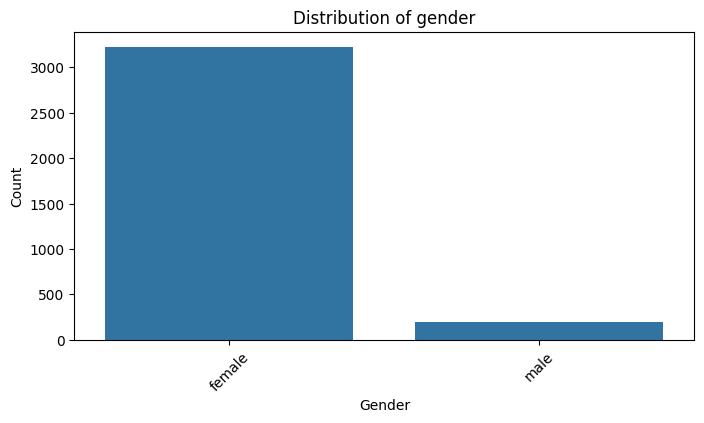

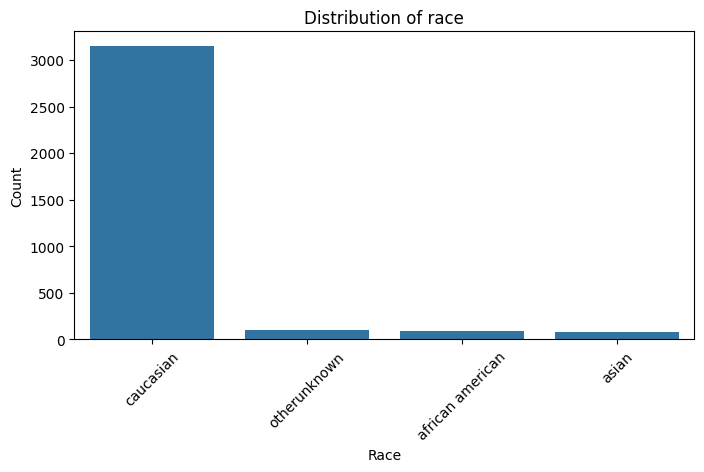

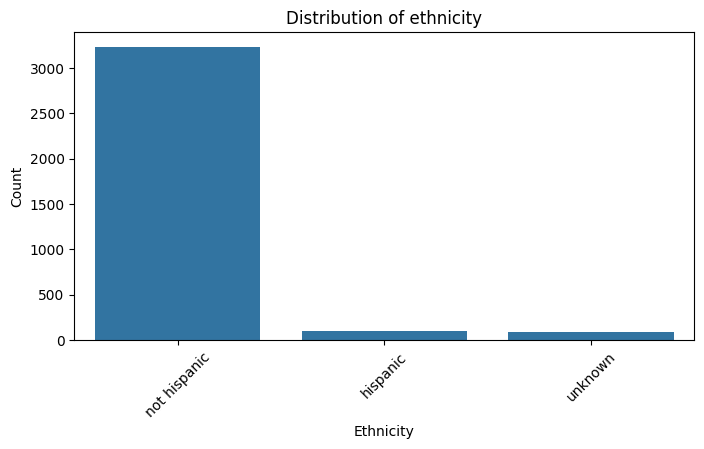

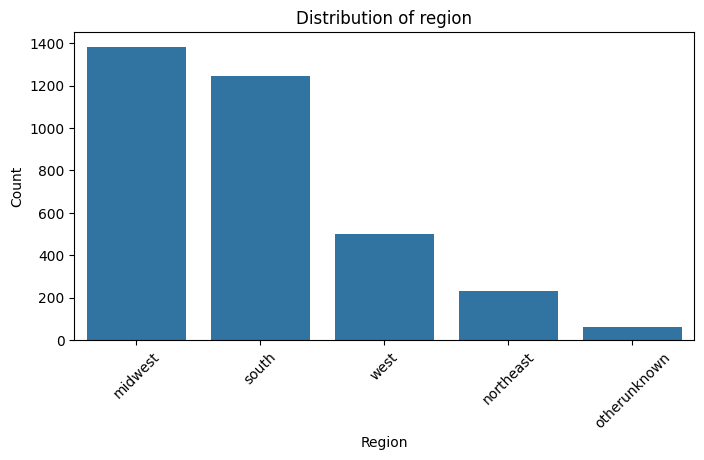


Unique values in gender: ['male' 'female']

Unique values in race: ['caucasian' 'asian' 'otherunknown' 'african american']

Unique values in ethnicity: ['not hispanic' 'hispanic' 'unknown']

Unique values in region: ['west' 'midwest' 'south' 'otherunknown' 'northeast']


In [133]:
# Plot distribution of categorical columns
categorical_cols_to_plot = ['gender', 'race', 'ethnicity', 'region']
for col in categorical_cols_to_plot:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Unique values in each categorical column
for col in categorical_cols_to_plot:
    print(f"\nUnique values in {col}: {df[col].unique()}")


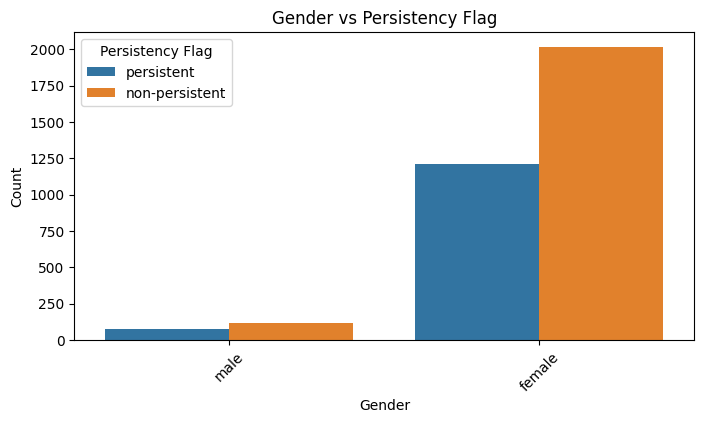

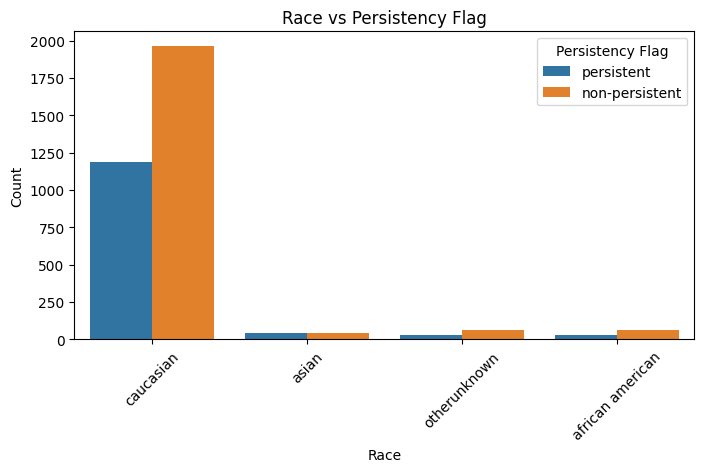

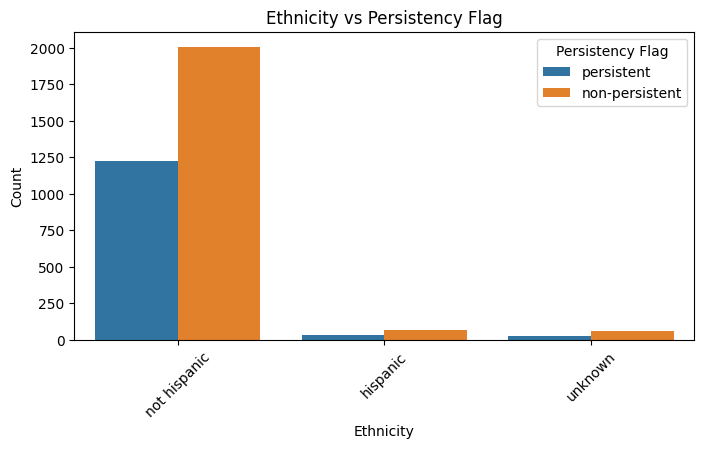

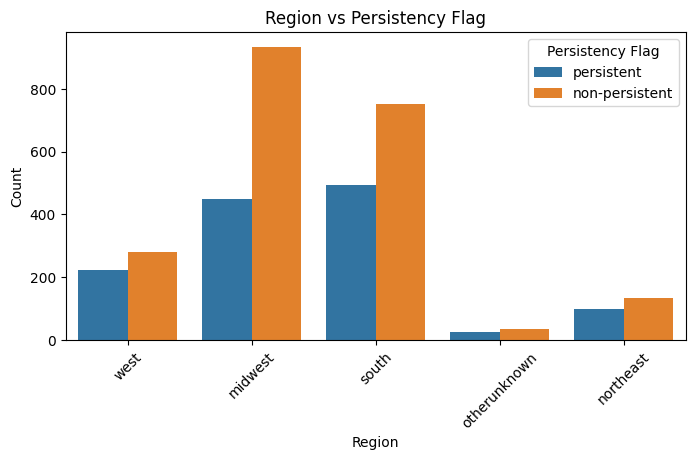

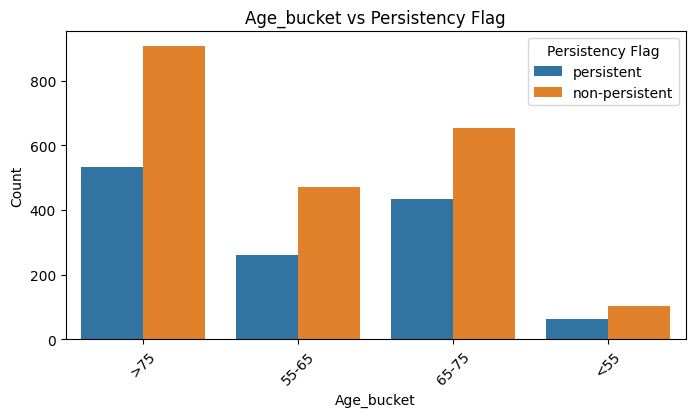

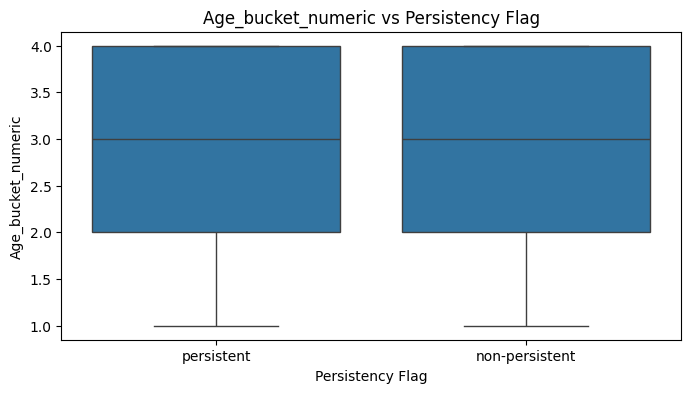

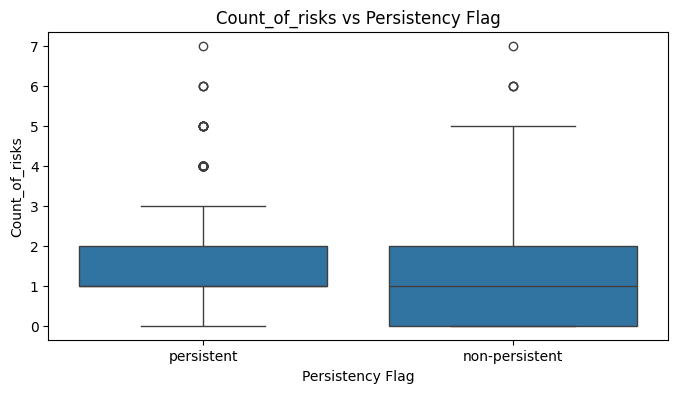

In [134]:
# Relationship between categorical variables and 'persistency_flag'
categorical_cols_for_relation = ['gender', 'race', 'ethnicity', 'region', 'age_bucket']
for col in categorical_cols_for_relation:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='persistency_flag')
    plt.title(f'{col.capitalize()} vs Persistency Flag')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Persistency Flag')
    plt.show()

# Relationship between numerical variables and 'persistency_flag'
numerical_cols_for_relation = ['age_bucket_numeric', 'count_of_risks']
for col in numerical_cols_for_relation:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='persistency_flag', y=col)
    plt.title(f'{col.capitalize()} vs Persistency Flag')
    plt.xlabel('Persistency Flag')
    plt.ylabel(col.capitalize())
    plt.show()


Text(0.5, 1.0, 'Vitamin D Deficiency and Persistency')

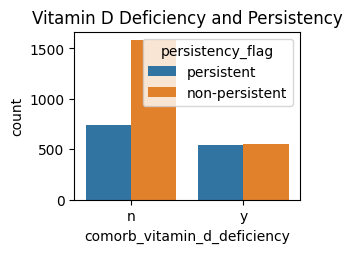

In [135]:
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='comorb_vitamin_d_deficiency', hue='persistency_flag')
plt.title('Vitamin D Deficiency and Persistency')

Text(0.5, 1.0, 'Risk Segment During RX by Persistency')

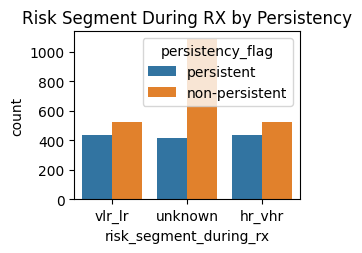

In [136]:
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='risk_segment_during_rx', hue='persistency_flag')
plt.title('Risk Segment During RX by Persistency')

In [137]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Select relevant columns for mutual information analysis
categorical_columns = df.select_dtypes(include=['object']).columns.tolist() + ['age_bucket_numeric', 'tscore_bucket_prior_numeric', 'tscore_bucket_during_numeric']

# Encode categorical variables using get_dummies or factorize
df_encoded = pd.get_dummies(df[categorical_columns], drop_first=True)

# Calculate mutual information between features and persistency_flag
mutual_info = mutual_info_classif(df_encoded, df['persistency_flag'], discrete_features='auto')

# Creating a DataFrame to present the results
mi_df = pd.DataFrame({'Feature': df_encoded.columns, 'Mutual Information': mutual_info})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Display the most important features
print(mi_df.head(10))



                                                Feature  Mutual Information
3426                        persistency_flag_persistent            0.662451
3480                                   dexa_during_rx_y            0.109026
3504            comorb_long_term_current_drug_therapy_y            0.060885
3498  comorb_encounter_for_screening_for_malignant_n...            0.046754
3500  comorb_encntr_for_general_exam_w_o_complaint,_...            0.041553
3520                      concom_anaesthetics_general_y            0.038180
3499                comorb_encounter_for_immunization_y            0.036778
688                                          ptid_p1616            0.033720
3506  comorb_personal_history_of_other_diseases_and_...            0.032544
3518              concom_macrolides_and_similar_types_y            0.029799


In [160]:
print("Key features like dexa_during_rx_y, long_term_drug_therapy_y, and screening_for_malignant_neoplasms_y show strong relationships with persistency_flag.")

print("\nDEXA Scan (dexa_during_rx_y): High mutual information suggests that patients receiving bone density tests during treatment tend to remain more persistent.")

print("\nLong-Term Drug Therapy (comorb_long_term_current_drug_therapy_y): Patients on long-term therapies show higher persistency, as sustained treatments are common for chronic conditions.")

print("\nCancer Screening (comorb_encounter_for_screening_for_malignant_neoplasms_y): Strong correlation suggests that patients undergoing cancer screenings are more likely to stay persistent, likely due to follow-up care.")

print("\nGeneral Exams (comorb_encntr_for_general_exam_w_o_complaint_y): Routine checkups without complaints are linked to higher treatment persistency, emphasizing the importance of preventive care.")

print("\nSystemic Corticosteroids (concom_systemic_corticosteroids_plain_y): Patients on corticosteroids, often for chronic conditions, tend to show higher treatment adherence.")

print("\nGERD (comorb_gastro_esophageal_reflux_disease_y): The association with persistency highlights that patients managing GERD tend to stay more engaged in their treatments.")


Key features like dexa_during_rx_y, long_term_drug_therapy_y, and screening_for_malignant_neoplasms_y show strong relationships with persistency_flag.

DEXA Scan (dexa_during_rx_y): High mutual information suggests that patients receiving bone density tests during treatment tend to remain more persistent.

Long-Term Drug Therapy (comorb_long_term_current_drug_therapy_y): Patients on long-term therapies show higher persistency, as sustained treatments are common for chronic conditions.

Cancer Screening (comorb_encounter_for_screening_for_malignant_neoplasms_y): Strong correlation suggests that patients undergoing cancer screenings are more likely to stay persistent, likely due to follow-up care.

General Exams (comorb_encntr_for_general_exam_w_o_complaint_y): Routine checkups without complaints are linked to higher treatment persistency, emphasizing the importance of preventive care.

Systemic Corticosteroids (concom_systemic_corticosteroids_plain_y): Patients on corticosteroids, often

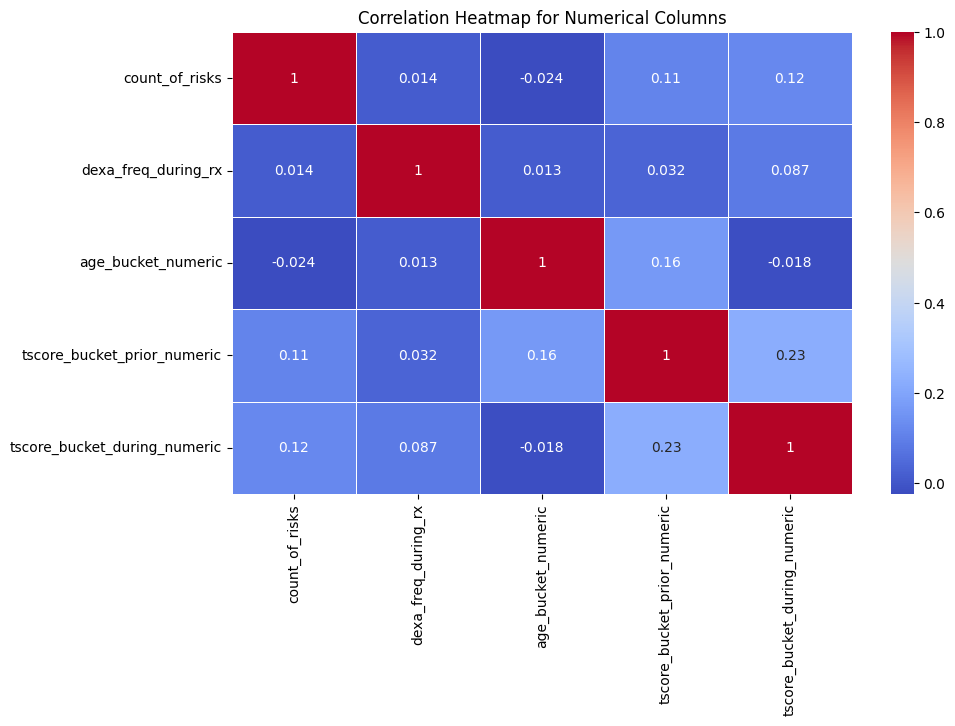

In [139]:

# Correlation matrix for numeric columns
corr_matrix = df[['count_of_risks', 'dexa_freq_during_rx', 'age_bucket_numeric', 'tscore_bucket_prior_numeric', 'tscore_bucket_during_numeric']].corr()

# Plotting the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()


In [140]:
print(" The correlations here are relatively low, meaning these numerical variables don't strongly correlate with each other but still need to be included for completeness.")

 The correlations here are relatively low, meaning these numerical variables don't strongly correlate with each other but still need to be included for completeness.


In [141]:
from scipy.stats import chi2_contingency

def chi_square_test(df, target, columns):
    results = []
    for col in columns:
        contingency_table = pd.crosstab(df[col], df[target])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        results.append((col, p))
    
    return pd.DataFrame(results, columns=['Feature', 'p-value']).sort_values(by='p-value')

# Apply chi-square test on categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()  # Adjust as necessary
chi_square_results = chi_square_test(df, 'persistency_flag', categorical_cols)

# Display significant features
print(chi_square_results[chi_square_results['p-value'] < 0.05])


                                              Feature        p-value
1                                    persistency_flag   0.000000e+00
12                                     dexa_during_rx  1.228016e-181
30              comorb_long_term_current_drug_therapy   2.725374e-94
24  comorb_encounter_for_screening_for_malignant_n...   4.704164e-79
25                  comorb_encounter_for_immunization   1.577445e-75
26  comorb_encntr_for_general_exam_w_o_complaint,_...   3.034899e-64
33  comorb_other_disorders_of_bone_density_and_str...   3.843970e-47
40              concom_systemic_corticosteroids_plain   1.375649e-45
28  comorb_other_joint_disorder_not_elsewhere_clas...   3.421073e-42
46                        concom_anaesthetics_general   2.133952e-38
47                              concom_viral_vaccines   2.462141e-38
44                concom_macrolides_and_similar_types   3.461452e-38
43                              concom_cephalosporins   3.595069e-38
37            comorb_gastro_esopha

In [142]:
print("This suggests many categorical variables have a meaningful relationship with the target, such as dexa_during_rx, comorb_long_term_current_drug_therapy, and various comorbidities.")

This suggests many categorical variables have a meaningful relationship with the target, such as dexa_during_rx, comorb_long_term_current_drug_therapy, and various comorbidities.


In [143]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'persistency_flag' column
df['persistency_flag_encoded'] = label_encoder.fit_transform(df['persistency_flag'])

# Check the encoding
print(df[['persistency_flag', 'persistency_flag_encoded']].head())


  persistency_flag  persistency_flag_encoded
0       persistent                         1
1   non-persistent                         0
2   non-persistent                         0
3   non-persistent                         0
4   non-persistent                         0


In [159]:
# Define target (y) and features (X)
y = df['persistency_flag_encoded']
X = df.drop(columns=['persistency_flag', 'persistency_flag_encoded'])  # Drop original and encoded target from features


In [145]:
# Define target (y) and features (X)
y = df['persistency_flag_encoded']
X = df.drop(columns=['persistency_flag', 'persistency_flag_encoded'])  # Drop original and encoded target from features

# Check the shape of X and y
print(X.shape, y.shape)


(3424, 71) (3424,)


In [146]:
print(df_encoded.columns)
print([col for col in df_encoded.columns if 'persistency' in col.lower()])


Index(['age_bucket_numeric', 'tscore_bucket_prior_numeric',
       'tscore_bucket_during_numeric', 'ptid_p10', 'ptid_p100', 'ptid_p1000',
       'ptid_p1001', 'ptid_p1002', 'ptid_p1003', 'ptid_p1004',
       ...
       'risk_chronic_liver_disease_y', 'risk_family_history_of_osteoporosis_y',
       'risk_low_calcium_intake_y', 'risk_vitamin_d_insufficiency_y',
       'risk_poor_health_frailty_y', 'risk_excessive_thinness_y',
       'risk_hysterectomy_oophorectomy_y', 'risk_estrogen_deficiency_y',
       'risk_immobilization_y', 'risk_recurring_falls_y'],
      dtype='object', length=3541)
['persistency_flag_persistent']


In [158]:
# Filter out ptid columns from your dataset
df_encoded = df_encoded.loc[:, ~df_encoded.columns.str.contains('^ptid')]
print(df_encoded.columns)


Index(['age_bucket_numeric', 'tscore_bucket_prior_numeric',
       'tscore_bucket_during_numeric', 'persistency_flag_persistent',
       'gender_male', 'race_asian', 'race_caucasian', 'race_otherunknown',
       'ethnicity_not hispanic', 'ethnicity_unknown',
       ...
       'risk_chronic_liver_disease_y', 'risk_family_history_of_osteoporosis_y',
       'risk_low_calcium_intake_y', 'risk_vitamin_d_insufficiency_y',
       'risk_poor_health_frailty_y', 'risk_excessive_thinness_y',
       'risk_hysterectomy_oophorectomy_y', 'risk_estrogen_deficiency_y',
       'risk_immobilization_y', 'risk_recurring_falls_y'],
      dtype='object', length=118)


In [148]:
# X: Features, drop 'persistency_flag_persistent' from features
X = df_encoded.drop(columns=['persistency_flag_persistent'])

# y: Target variable
y = df_encoded['persistency_flag_persistent']

# Train the logistic regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression:", accuracy)


Accuracy of Logistic Regression: 0.8087591240875912


In [149]:
from sklearn.preprocessing import StandardScaler

# Scaling numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [150]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for hyperparameter tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Logistic Regression with cross-validation
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'C': 0.1}


In [151]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.83      0.87      0.85       431
        True       0.76      0.70      0.73       254

    accuracy                           0.81       685
   macro avg       0.80      0.79      0.79       685
weighted avg       0.81      0.81      0.81       685



In [152]:
# Feature importance (coefficients) from Logistic Regression
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]
}).sort_values(by='Importance', ascending=False)

print(feature_importance)


                                             Feature  Importance
56                                  dexa_during_rx_y    1.951815
38                         ntm_speciality_pediatrics    1.370117
37                          ntm_speciality_pathology    1.016506
80           comorb_long_term_current_drug_therapy_y    1.013016
97                           concom_viral_vaccines_y    0.951225
..                                               ...         ...
46   ntm_speciality_surgery and surgical specialties   -0.636195
115                            risk_immobilization_y   -0.720427
43                 ntm_speciality_pulmonary medicine   -0.728699
116                           risk_recurring_falls_y   -0.811641
98          risk_type_1_insulin_dependent_diabetes_y   -0.982359

[117 rows x 2 columns]


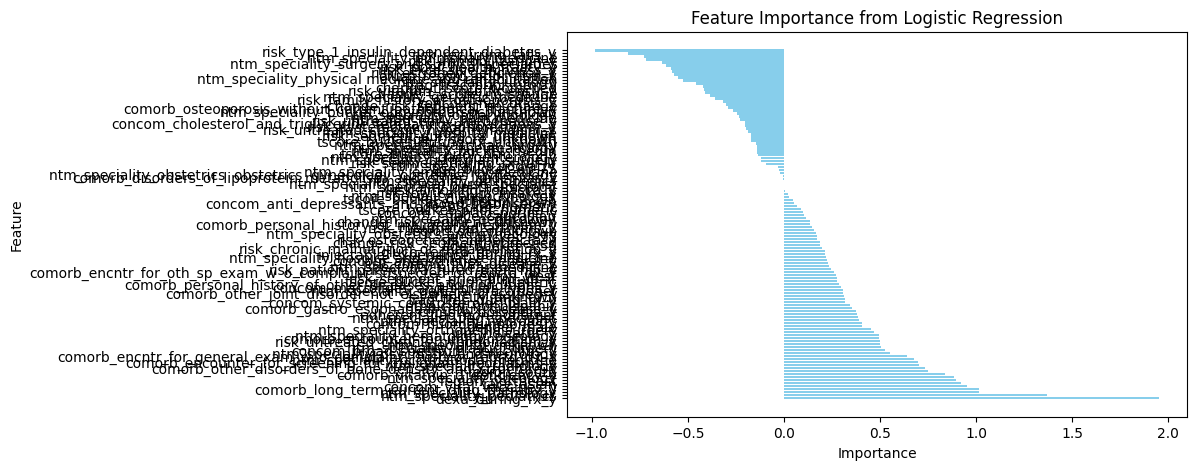

In [153]:
import matplotlib.pyplot as plt

# Plotting the feature importance
plt.figure(figsize=(8, 5))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression')
plt.show()


In [154]:
# Drop 'ptid' columns and original 'persistency_flag' if they exist
df_encoded = df_encoded.drop(columns=['persistency_flag'], errors='ignore')
df_encoded = df_encoded.loc[:, ~df_encoded.columns.str.contains('^ptid')]

# Separate features and target (using 'persistency_flag_persistent' as the target)
X = df_encoded.drop('persistency_flag_persistent', axis=1)
y = df_encoded['persistency_flag_persistent']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest: {accuracy}")

# Feature importance
feature_importances = rf.feature_importances_
important_features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display top important features
print(important_features.head(10))


Accuracy of Random Forest: 0.7986381322957199
                                              Feature  Importance
56                                   dexa_during_rx_y    0.111119
80            comorb_long_term_current_drug_therapy_y    0.048429
74  comorb_encounter_for_screening_for_malignant_n...    0.039659
76  comorb_encntr_for_general_exam_w_o_complaint,_...    0.035783
75                comorb_encounter_for_immunization_y    0.034515
83  comorb_other_disorders_of_bone_density_and_str...    0.023971
0                                  age_bucket_numeric    0.021793
97                            concom_viral_vaccines_y    0.018609
82  comorb_personal_history_of_other_diseases_and_...    0.017446
78  comorb_other_joint_disorder_not_elsewhere_clas...    0.017212


In [156]:

# Instantiate the Logistic Regression model with the best parameter for C
logreg = LogisticRegression(C=0.1, solver='liblinear')

logreg.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = logreg.score(X_test, y_test)
print(f"Accuracy of Logistic Regression with C=0.1: {accuracy}")


Accuracy of Logistic Regression with C=0.1: 0.8005836575875487


In [157]:
print("Best result so far after 3 trainings(Logistic Regression): Accuracy of Logistic Regression: 0.8087591240875912")

Best result so far after 3 trainings(Logistic Regression): Accuracy of Logistic Regression: 0.8087591240875912
